# Iris Dataset Exploration

## Explore the similarities, differences and relationships among three different Iris species in terms of their sepal and petal widths and lengths

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from pandas_profiling import ProfileReport
from sklearn.datasets import load_iris
%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.2)

## Load Dataset, Explore and Display Features

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df['target'] = iris_df['target'].replace([0,1,2],['setosa', 'versicolor', 'virginica'])

In [23]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris_df.shape

(150, 5)

In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris_df['target'].describe()

count        150
unique         3
top       setosa
freq          50
Name: target, dtype: object

In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Observations:
* The dataset contains 150 observations, has 4 predictive attributes and 1 target variable
* The 4 predictive attributes are numerical, the target variable is categorical
* Changed the target attribute labels to a descriptive string vs numerical category for ease in analysis
* There are 3 unique target variables: setosa, versicolor and virginica; each a species of Iris
* See the table above for numerical measures of the 4 predictive attributes. Note:
    * petal length has the largest range and greatest variation of the 4 attributes, and also has the greatest difference of the 4 between its mean and median
    * for the other three attributes, their mean approximates their median which suggests the mean is not affected by outliers

## Explore the dataset using tools and libraries available in Python

In [11]:
profile = ProfileReport(iris_df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Observations:

* The dataset has zero missing observations
* This is a balanced dataset in that each of the three target labels have the same number of observations
* The distributions of sepal length and sepal width are fairly normal
* The distributions of petal length and petal width both have two distinct groupings
* Correlation - because the 4 predictive attributes are all numerical, refer to the Pearson's r chart, above:
    * Sepal width and sepal length appear to be uncorrelated
    * Petal width and petal length appear to be highly correlated
    * Petal length and sepal length appear to be fairly correlated
    * Petal width and sepal length also appear to be correlated, though less so than petal length and sepal length    
* Correlation - see pair plot graphs below for visual confirmation of the above correlation observations

## Calculations of dot product, norm and distance

In [13]:
# First step: normalize  the two vectors using z-score normalization
iris_df_norm = (iris_df[iris_df.columns[:-1]] - iris_df.mean()) / (iris_df.std())
iris_df_norm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [14]:
# Calculate dot product between the sepal length vector vs the sepal width vector
s_length = iris_df_norm['sepal length (cm)']
s_width = iris_df_norm['sepal width (cm)']
s_length.dot(s_width)

-17.517897835817315

In [15]:
# Calculate the norm of the sepal length vectors
s_length = iris_df_norm['sepal length (cm)']
sepal_length_norm = np.linalg.norm(s_length)
sepal_length_norm

12.206555615733706

In [16]:
# Calculate the norm of the sepal width vectors
s_width = iris_df_norm['sepal width (cm)']
sepal_width_norm = np.linalg.norm(s_width)
sepal_width_norm

12.206555615733707

In [17]:
# Calculate the distance between the sepal length vector and the sepal width vector, 
# note we are using Euclidean distance, ie. "straight line"
s_length = iris_df_norm['sepal length (cm)']
s_width = iris_df_norm['sepal width (cm)']
dist = (np.linalg.norm(s_length - s_width))
dist

18.24926835989966

### Observations:

* The above calculations are meant to measure similarity between sepal length and sepal width (measures of proximity)


    * The dot product between sepal length and sepal width is -17.51.  The dot product can be used to calculate the cosine of the angle between the vectors(cosine similarity). The cosine of the angle between the two vectors is cos(theta) = dot product divided by the product of the lengths of each vector = -17.5179/(12.2066\*12.2066)=-0.1176 (note this is the Pearson's r correlation value). This cosine indicates these vectors not very similar. This is supported by the fact that a cosine of zero would mean the angle between the vectors is 90% which indicates orthoganality, which means they have no similarity.  This cosine is close to zero.  Note that this dissimilarity is supported visually by the scatterplot in the next section, which does not indicate a strong relationship between the two attributes.
    
    
    * The Euclidean distance is another indicator of similarity/dissimilarity.  To convert the Euclidian distance to a "distanced based similarity score", divide 1 by 1+distance, so 1/(1+18.2493) = 0.0519.  The score for two vectors with zero distance would be a 1 (1/(1+0)=1).  A score of 0.0519 indicates that the vectors are dissimilar, which is consistent with the results obtained using the dot product.

## Visualizations

### Sepal length and sepal width

[Text(0.5, 1.0, 'Sepal Length vs. Width - Colored by Sepal Width')]

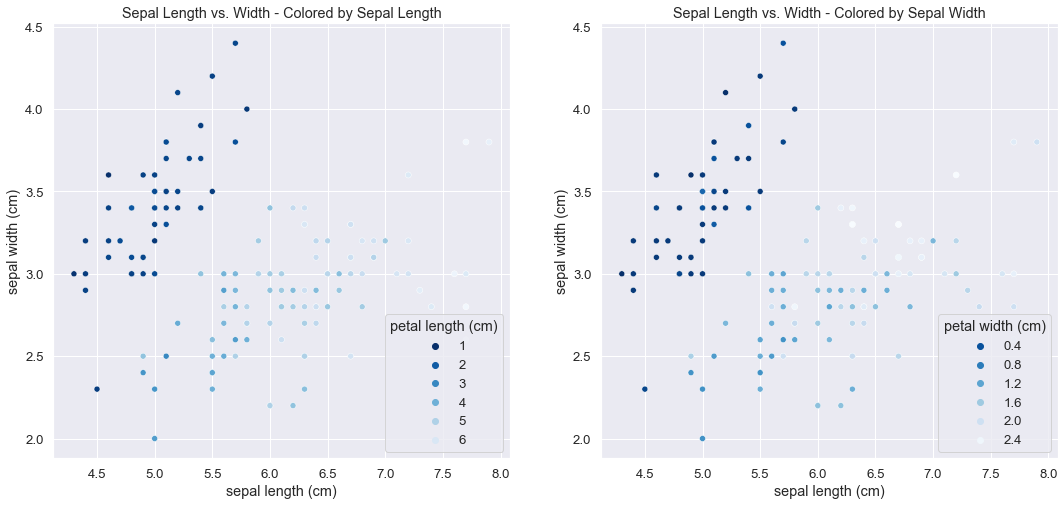

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris_df, hue='petal length (cm)', palette='Blues_r', 
                ax=ax1).set(title='Sepal Length vs. Width - Colored by Petal Length')
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris_df, hue='petal width (cm)', palette='Blues_r', 
                ax=ax2).set(title='Sepal Length vs. Width - Colored by Petal Width')

### Petal length and petal width

[Text(0.5, 1.0, 'Petal Length vs. Width - Colored by Sepal Width')]

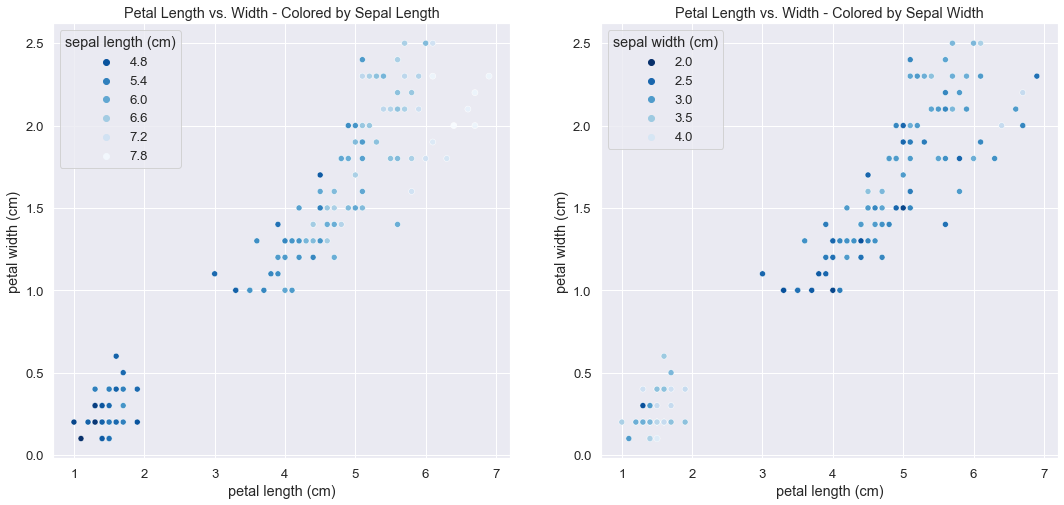

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=iris_df, hue='sepal length (cm)', palette='Blues_r', 
                ax=ax1).set(title='Petal Length vs. Width - Colored by Sepal Length')
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=iris_df, hue='sepal width (cm)', palette='Blues_r', 
                ax=ax2).set(title='Petal Length vs. Width - Colored by Sepal Width')

### Pairplots of predictive attributes by type of species

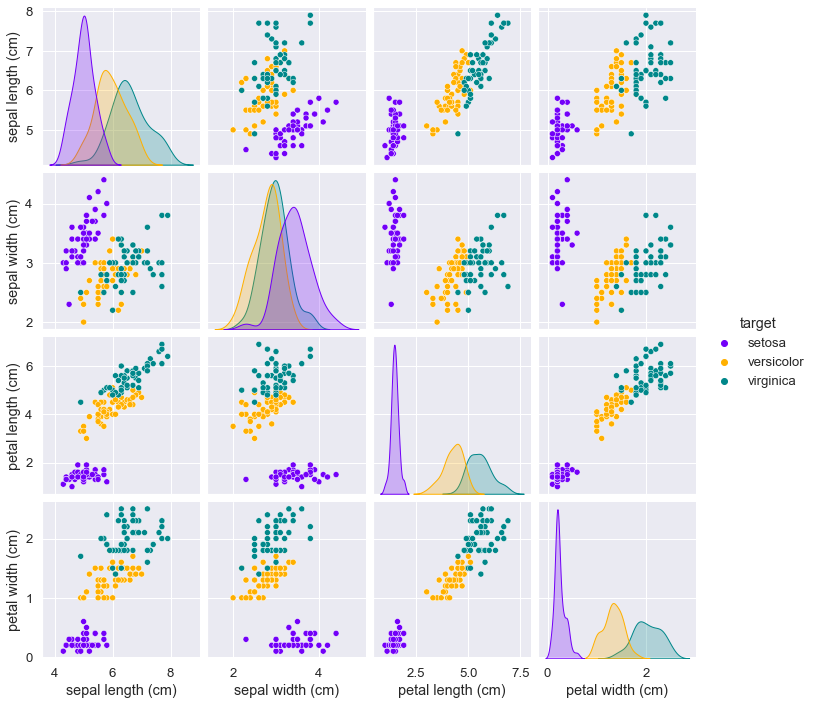

In [20]:
sns.pairplot(iris_df, hue='target', palette="prism_r");

### Boxplots of each predictive attribute by type of species

[Text(0.5, 1.0, 'Petal Width')]

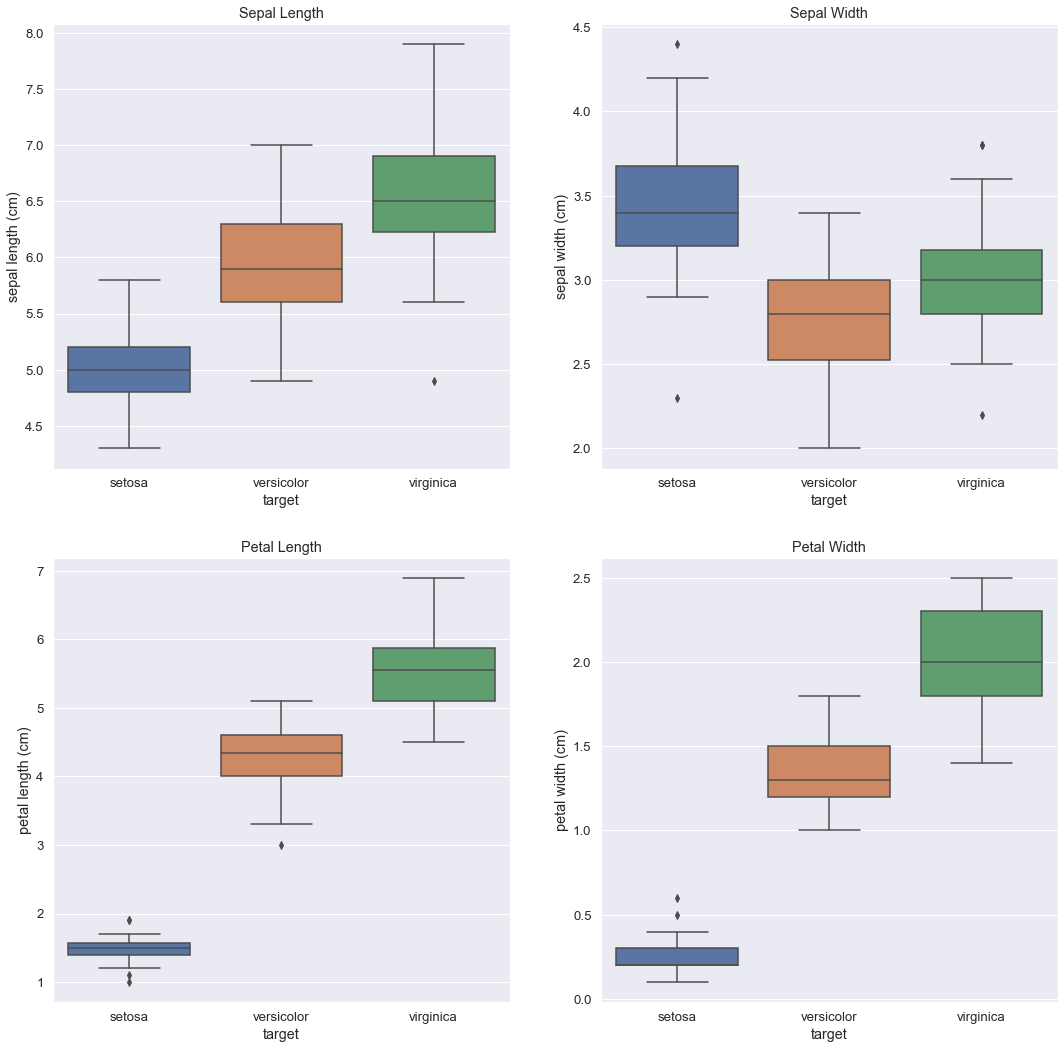

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (18, 18))
sns.boxplot(x = 'target', y = 'sepal length (cm)', data = iris_df, ax=ax1).set(title='Sepal Length')
sns.boxplot(x = 'target', y = 'sepal width (cm)', data = iris_df, ax=ax2).set(title='Sepal Width')
sns.boxplot(x = 'target', y = 'petal length (cm)', data = iris_df, ax=ax3).set(title='Petal Length')
sns.boxplot(x = 'target', y = 'petal width (cm)', data = iris_df, ax=ax4).set(title='Petal Width')

### Observations:
* There doesn't appear to be a clear relationship between sepal width and sepal length in general
    * Both the observations with petals that are lower in length (1-3 cm) and those with petals that are lower in width (0.4-0.8 cm) primarily correspond to those with a sepal length less than 6 cm and a sepal width greater than 3 cm
* There appears to be a fairly strong relationship between petal length and petal width, as well as two distinct groupings
    * Adding sepal length or sepal width didn't indicate any additional patterns
* The pairplots show that Setosa is highly distinguishable from the other two species in all comparisons
    * Additionally, petal length and petal width both help to distinguish Versicolor from Virginica
* The boxplots show results consistent with the pairplots, but from a different view:
    * For sepal length, there is overlap between the three species, although Setosa is more tightly grouped and there appears to be an order from lowest values to highest values of: Setosa, Versicolor, Virginica, though again there is overlap
    * For sepal width, there is again overlap among the three this time with Setosa on the higher end and with Versicolor and Virginica's ranges with more overlap with each other.
    * For both petal length and petal width, Setosa is completely separate from the other two at the low end of the values while the other two have some overlap but their interquartile ranges are separated from each other.  In each case (petal length and width), the order from primarily low range of values to high range of values is: Setosa, Versicolor, Virginica

## Conclusions: 
* Combining sepal width and sepal length allows the species Setosa to be distinguishable from the other two species.
    * Observations with sepal width above 3 cm and sepal length less than about 6 cm are very likely to be Setosa.
* Petal length and petal width each alone and also taken together give a high indication of Setosa.
    * Observations with petal length less than 3 cm, are highly likely to be Setosa
    * Observations with petal width less than 1 cm, are highly likely to be Setosa
* Petal length and petal width taken together helps to distinguish Versicolor from Virginica
    * Observations with petal length between 3 cm and 5 cm, and petal width between 1 and 1.5, are highly likely to be Versicolor
    * Observations with petal length greater than 5 cm, and petal width greater than 1.5, are highly likely to be Virginica
* Overall, petal length and petal width would be useful as classification criteria